In [58]:
import random
import pandas as pd
import time

# Simulate 100 rows of sensor data
def simulate_sensor_data():
    return {
        "voltage": round(random.uniform(210, 240), 2),
        "current": round(random.uniform(5, 15), 2),
        "temperature": round(random.uniform(25, 45), 2),
        "timestamp": pd.Timestamp.now()
    }

# Generate dataset
df = pd.DataFrame([simulate_sensor_data() for _ in range(100)])
df.head()


,voltage,current,temperature,timestamp
0,214.66,12.44,42.68,2025-06-10 16:41:30.469950
1,211.06,13.49,29.11,2025-06-10 16:41:30.469950
2,232.54,8.84,38.58,2025-06-10 16:41:30.469950
3,226.75,7.63,28.98,2025-06-10 16:41:30.469950
4,220.61,6.33,44.96,2025-06-10 16:41:30.469950


In [59]:
def detect_anomaly(row):
    return row['voltage'] > 235 or row['temperature'] > 40

df['anomaly'] = df.apply(detect_anomaly, axis=1)
# ✅ Filter and save anomaly data (optional)
alerts = df[df['anomaly']]
alerts.to_csv("anomaly_logs.csv", index=False)
print("✅ Alerts saved to anomaly_logs.csv")



✅ Alerts saved to anomaly_logs.csv


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a load column
df['load'] = df['voltage'] * df['current']

X = df[['voltage', 'current', 'temperature']]
y = df['load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

predicted_load = model.predict(X_test)
for i, prediction in enumerate(predicted_load[:10]):
    print(f"🔮 Predicted Load {i+1}: {round(prediction, 2)} W")





🔮 Predicted Load 1: 1823.94 W
🔮 Predicted Load 2: 2502.92 W
🔮 Predicted Load 3: 1523.16 W
🔮 Predicted Load 4: 1273.12 W
🔮 Predicted Load 5: 1228.3 W
🔮 Predicted Load 6: 2878.73 W
🔮 Predicted Load 7: 2786.96 W
🔮 Predicted Load 8: 1964.05 W
🔮 Predicted Load 9: 2853.5 W
🔮 Predicted Load 10: 1746.98 W


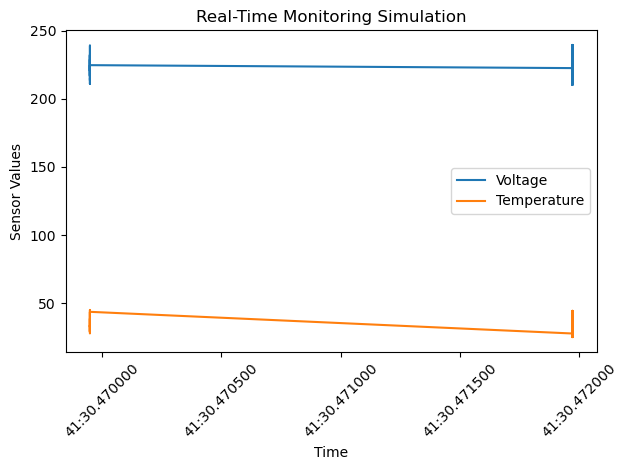

In [61]:
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['voltage'], label='Voltage')
plt.plot(df['timestamp'], df['temperature'], label='Temperature')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.title("Real-Time Monitoring Simulation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
alerts = df[df['anomaly'] == True]

for _, row in alerts.iterrows():
    print(f"⚠️ ALERT at {row['timestamp']}: High reading detected! Voltage={row['voltage']}V Temp={row['temperature']}°C")
print(f"⚠️ Total Alerts Detected: {df['anomaly'].sum()}")


⚠️ ALERT at 2025-06-10 16:41:30.469950: High reading detected! Voltage=214.66V Temp=42.68°C
⚠️ ALERT at 2025-06-10 16:41:30.469950: High reading detected! Voltage=220.61V Temp=44.96°C
⚠️ ALERT at 2025-06-10 16:41:30.469950: High reading detected! Voltage=239.18V Temp=33.32°C
⚠️ ALERT at 2025-06-10 16:41:30.469950: High reading detected! Voltage=216.64V Temp=40.26°C
⚠️ ALERT at 2025-06-10 16:41:30.469950: High reading detected! Voltage=224.8V Temp=43.6°C
⚠️ ALERT at 2025-06-10 16:41:30.471971: High reading detected! Voltage=237.12V Temp=43.31°C
⚠️ ALERT at 2025-06-10 16:41:30.471971: High reading detected! Voltage=237.5V Temp=32.92°C
⚠️ ALERT at 2025-06-10 16:41:30.471971: High reading detected! Voltage=237.83V Temp=34.83°C
⚠️ ALERT at 2025-06-10 16:41:30.471971: High reading detected! Voltage=233.15V Temp=40.07°C
⚠️ ALERT at 2025-06-10 16:41:30.471971: High reading detected! Voltage=215.68V Temp=42.05°C
⚠️ ALERT at 2025-06-10 16:41:30.471971: High reading detected! Voltage=216.87V Temp

In [63]:
import sys
!{sys.executable} -m pip install paho-mqtt


Defaulting to user installation because normal site-packages is not writeable


In [64]:
!pip show paho-mqtt
import sys
print(sys.executable)



Name: paho-mqtt
Version: 2.1.0
Summary: MQTT version 5.0/3.1.1 client class
Home-page: http://eclipse.org/paho
Author: 
Author-email: Roger Light <roger@atchoo.org>
License: EPL-2.0 OR BSD-3-Clause
Location: C:\Users\vp380\AppData\Roaming\Python\Python312\site-packages
Requires: 
Required-by: 
C:\ProgramData\anaconda3\python.exe


In [65]:
import paho.mqtt.publish as publish
import json

for i in range(10):
    payload = {
        "voltage": round(random.uniform(220, 240), 2),
        "current": round(random.uniform(5, 15), 2),
        "temperature": round(random.uniform(30, 45), 2)
    }
    publish.single("grid/sensors", json.dumps(payload), hostname="broker.hivemq.com")
    print("📤 Sent:", payload)
    time.sleep(2)


📤 Sent: {'voltage': 233.36, 'current': 14.94, 'temperature': 43.24}
📤 Sent: {'voltage': 230.84, 'current': 10.0, 'temperature': 40.95}
📤 Sent: {'voltage': 238.77, 'current': 10.66, 'temperature': 30.0}
📤 Sent: {'voltage': 237.66, 'current': 6.46, 'temperature': 38.63}
📤 Sent: {'voltage': 223.25, 'current': 5.85, 'temperature': 41.39}
📤 Sent: {'voltage': 230.5, 'current': 11.0, 'temperature': 30.67}
📤 Sent: {'voltage': 235.17, 'current': 12.71, 'temperature': 30.32}
📤 Sent: {'voltage': 227.21, 'current': 6.38, 'temperature': 39.13}
📤 Sent: {'voltage': 229.67, 'current': 9.7, 'temperature': 38.04}
📤 Sent: {'voltage': 235.28, 'current': 5.43, 'temperature': 31.73}
